**Loan Prediction Model**

**Life cycle of Machine learning Project**
-  Understanding the Problem Statement
-  Data Collection
-  Data Checks to perform
-  Exploratory data analysis
-  Data Pre-Processing
-  Model Training
-  Choose best model

**Problem statement**

Banks receive a large number of loan applications every day, and manually checking each application is time-consuming and may lead to errors or unfair decisions. It becomes difficult to accurately identify whether an applicant is capable of repaying the loan based on factors like income, credit history, employment status, and loan amount. The problem is to develop a machine learning-based Loan Prediction system that can analyze applicant data and predict whether the loan should be approved or rejected, helping banks make faster, more accurate, and reliable decisions.

**Data Collection**

-  Data source : https://www.kaggle.com/datasets/ninzaami/loan-predication
-  The data consists of 13 column and 614 rows.

**Import Data and Required Packages**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
loan_df=pd.read_csv(r'C:\Users\DELL\Desktop\virat\loan_prediction.csv')

In [8]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


**Shape of the dataset**

In [12]:
loan_df.shape

(614, 13)

**Dataset Information**
-  gender : Gender of applicant → (Male / Female)
-  married : Marital status of applicant → (Yes / No)
-  dependents : Number of dependents → (0, 1, 2, 3+)
-  education : Education level → (Graduate / Not Graduate)
-  self_employed : Self employment status → (Yes / No)
-  applicant_income : Income of applicant → (Numeric value)
-  coapplicant_income : Income of co-applicant → (Numeric value)
-  loan_amount : Loan amount requested → (Numeric value)
-  loan_amount_term : Loan repayment term (in months) → (Numeric value)
-  credit_history : Credit history of applicant → (1 = Good, 0 = Bad)
-  property_area : Property location → (Urban / Semiurban / Rural)
-  loan_status : Loan approval status → (Y = Approved, N = Not Approved)
  

**Data Checks to perform**

-  Check Missing values
-  Check Duplicates
-  Check data type
-  Check the number of unique values of each column
-  Check statistics of data set
-  Check various categories present in the different categorical column

 **Check Missing values**

In [16]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
loan_df.replace({"3+":"4"})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
loan_df.drop('Loan_ID',axis=1,inplace=True)

**Seperate categorical and numerical**

In [19]:
# seperate categorical and numerical columns
num=loan_df.select_dtypes(include=['number']).columns
cat=loan_df.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
num: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [23]:
loan_df[num]=loan_df[num].fillna(loan_df[num].median())

In [24]:
loan_df[cat]=loan_df[cat].fillna(loan_df[cat].mode().iloc[0])

In [25]:
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 **Check Duplicates**

In [28]:
loan_df.duplicated().sum()
#There are no duplicates values in the data set

np.int64(0)

**Check data types**

In [29]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


**Checking the number of unique values of each column**

In [30]:
loan_df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Check statistics of data set**

In [31]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


**Insight**

The average applicant income is around 5403, while the average co-applicant income is about 1621, showing that most applicants earn more than their co-applicants. The average loan amount is around 146, and most loan terms are 360 months (30 years). Also, about 85% of applicants have good credit history (1), which is an important factor for loan approval.

**Exploring Data**

In [32]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Categorical Analysis**

In [33]:
cat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
for i in cat:
    a=loan_df[i].unique()
    print(i,a)

Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


**Data Visualization**

**BAR GRAPH**

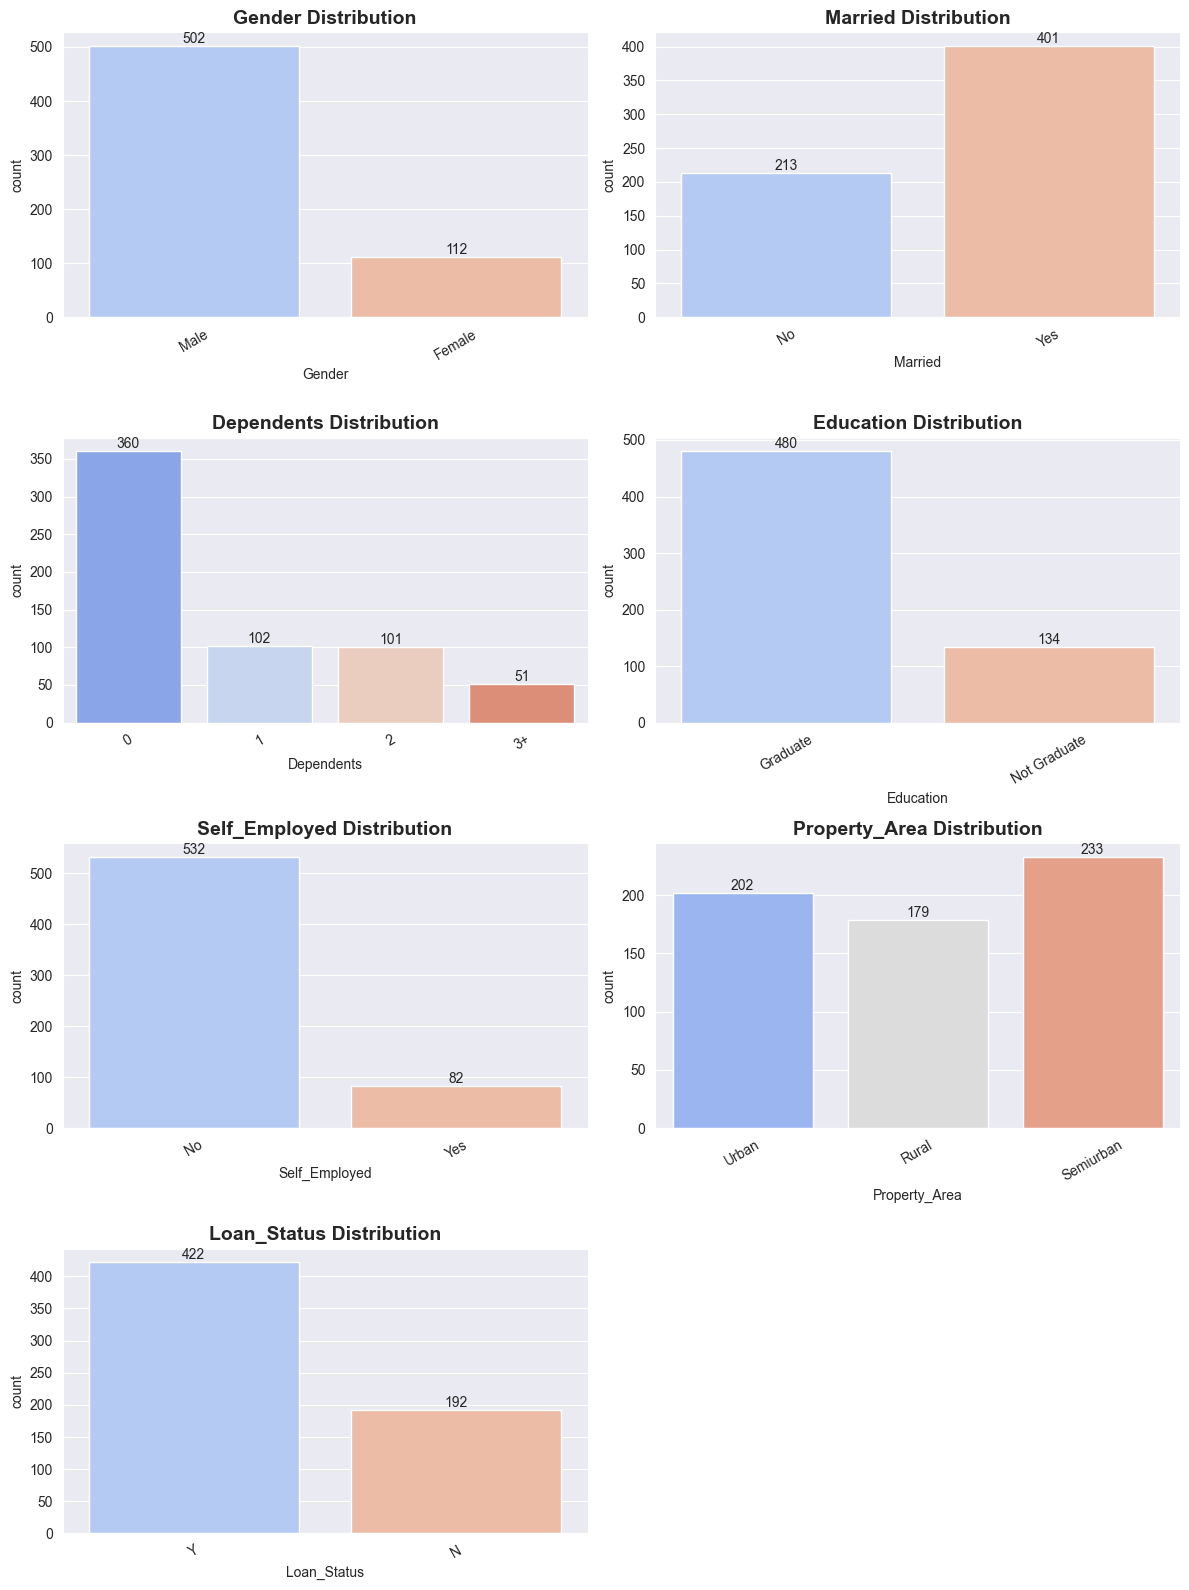

In [36]:
plt.figure(figsize=(12,16))
sns.set_style("darkgrid")

for i, column in enumerate(cat):
    plt.subplot(4, 2, i+1)
    
    ax = sns.countplot(
        data=loan_df,
        x=column,
        palette="coolwarm"
    )
    
    plt.title(f"{column} Distribution", fontsize=14, weight='bold')
    plt.xticks(rotation=30)
    
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()


**Pie chart**

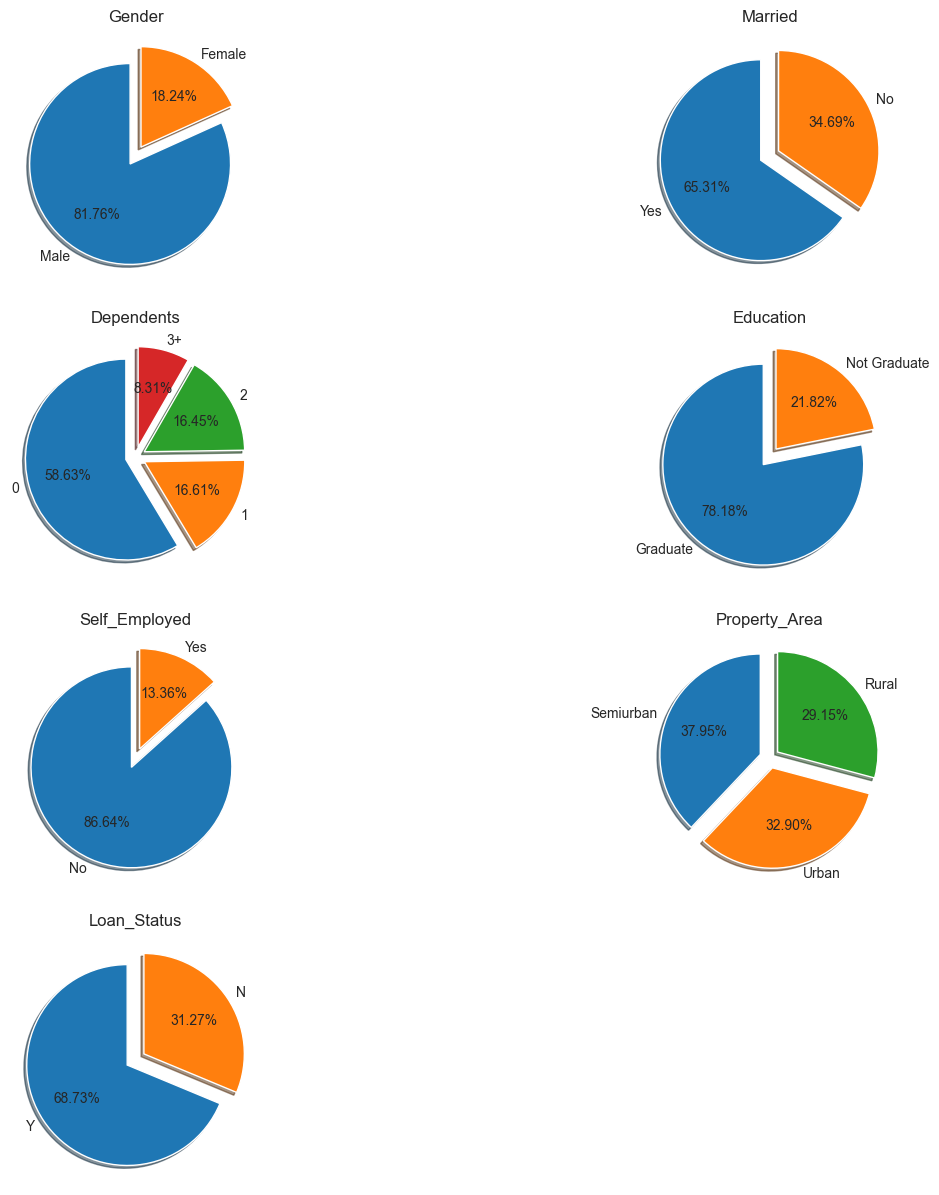

In [37]:
plt.figure(figsize=(15,15))
for i,column in enumerate(cat):
    plt.subplot(4,2,i+1)
    loan_df[column].value_counts()
    Property=loan_df[column].value_counts(normalize=True).keys()
    count=loan_df[column].value_counts(normalize=True).values
    Data=pd.DataFrame(zip(Property,count),columns=[column,'Count'])
    n=loan_df[column].nunique()
    l=[0.1 for i in range(n)]
    plt.title(column)
    plt.pie(x=count,labels=Property,autopct='%0.2f%%',shadow=True,radius=1,startangle=90,explode=l)
plt.show()

**Numerical Data Analysis**

In [38]:
for i in num:
    d_count=round(loan_df[i].count(),2)
    d_max=round(loan_df[i].max(),2)
    d_min=round(loan_df[i].min(),2)
    d_mean=round(loan_df[i].mean(),2)
    d_median=round(loan_df[i].median(),2)
    d_std=round(loan_df[i].std(),2)

    print(i,'count:',d_count)
    print(i,'max:',d_max)
    print(i,'min:',d_min)
    print(i,'mean:',d_mean)
    print(i,'median:',d_median)
    print(i,'std:',d_std)
    print('------------------------------------')

ApplicantIncome count: 614
ApplicantIncome max: 81000
ApplicantIncome min: 150
ApplicantIncome mean: 5403.46
ApplicantIncome median: 3812.5
ApplicantIncome std: 6109.04
------------------------------------
CoapplicantIncome count: 614
CoapplicantIncome max: 41667.0
CoapplicantIncome min: 0.0
CoapplicantIncome mean: 1621.25
CoapplicantIncome median: 1188.5
CoapplicantIncome std: 2926.25
------------------------------------
LoanAmount count: 614
LoanAmount max: 700.0
LoanAmount min: 9.0
LoanAmount mean: 145.75
LoanAmount median: 128.0
LoanAmount std: 84.11
------------------------------------
Loan_Amount_Term count: 614
Loan_Amount_Term max: 480.0
Loan_Amount_Term min: 12.0
Loan_Amount_Term mean: 342.41
Loan_Amount_Term median: 360.0
Loan_Amount_Term std: 64.43
------------------------------------
Credit_History count: 614
Credit_History max: 1.0
Credit_History min: 0.0
Credit_History mean: 0.86
Credit_History median: 1.0
Credit_History std: 0.35
------------------------------------


In [39]:
for i in num:
    q1=np.quantile(loan_df[i],0.25)
    q2=np.quantile(loan_df[i],0.50)
    q3=np.quantile(loan_df[i],0.75)
    print(i,'q1:',q1)
    print(i,'q2:',q2)
    print(i,'q3:',3)
    print('------------')

ApplicantIncome q1: 2877.5
ApplicantIncome q2: 3812.5
ApplicantIncome q3: 3
------------
CoapplicantIncome q1: 0.0
CoapplicantIncome q2: 1188.5
CoapplicantIncome q3: 3
------------
LoanAmount q1: 100.25
LoanAmount q2: 128.0
LoanAmount q3: 3
------------
Loan_Amount_Term q1: 360.0
Loan_Amount_Term q2: 360.0
Loan_Amount_Term q3: 3
------------
Credit_History q1: 1.0
Credit_History q2: 1.0
Credit_History q3: 3
------------


**Histogram**

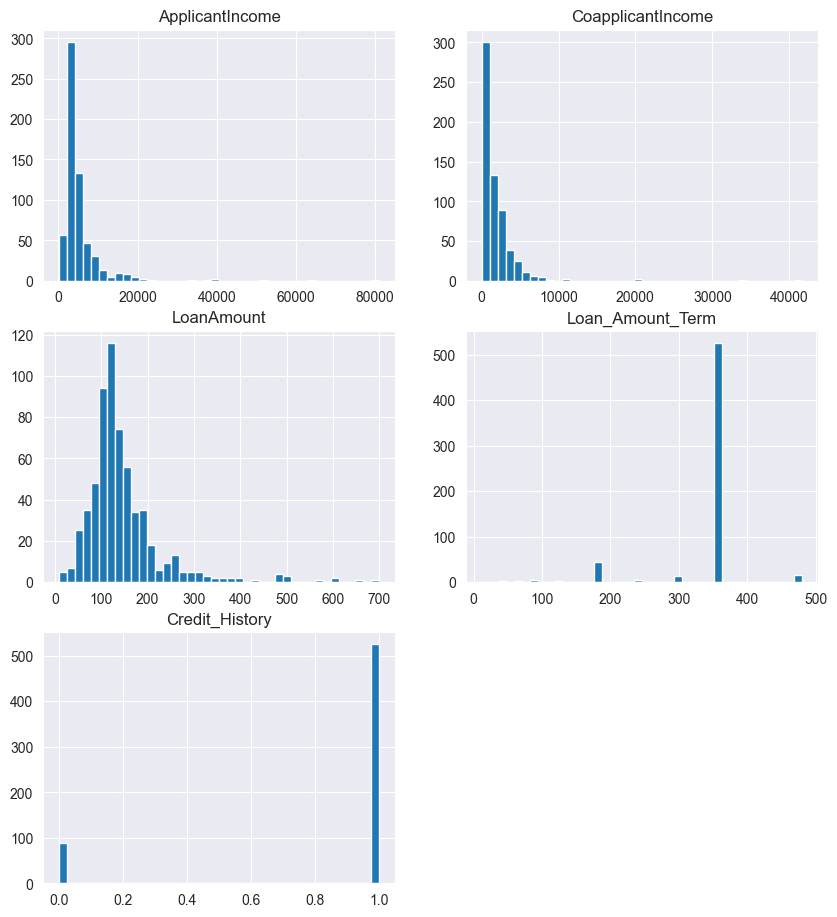

In [40]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(4,2,i+1)
    plt.title(column)
    plt.hist(loan_df[column],bins=40)
plt.show()

**Empirical Rule**

In [41]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [42]:
mean=loan_df['ApplicantIncome'].mean()
std=loan_df['ApplicantIncome'].std()

In [43]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['ApplicantIncome']>val_minus_1
con2=loan_df['ApplicantIncome']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['ApplicantIncome']>val_minus_2
con4=loan_df['ApplicantIncome']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['ApplicantIncome']>val_minus_3
con6=loan_df['ApplicantIncome']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 0.9348534201954397
ep2: 0.9739413680781759
ep3: 0.9739413680781759


In [44]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['Loan_Amount_Term']>val_minus_1
con2=loan_df['Loan_Amount_Term']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['Loan_Amount_Term']>val_minus_2
con4=loan_df['Loan_Amount_Term']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['Loan_Amount_Term']>val_minus_3
con6=loan_df['Loan_Amount_Term']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [45]:
val_minus_1=mean-(1*std)
val_plus_1=mean+(1*std)
val_minus_2=mean-(2*std)
val_plus_2=mean+(2*std)
val_minus_3=mean-(3*std)
val_plus_3=mean+(3*std)
con1=loan_df['Credit_History']>val_minus_1
con2=loan_df['Credit_History']<val_plus_1

ep1=len(loan_df[con1&con2])
ep2=ep1/len(loan_df)

con3=loan_df['Credit_History']>val_minus_2
con4=loan_df['Credit_History']<val_plus_2

ep3=len(loan_df[con3&con4])
ep4=ep3/len(loan_df)

con5=loan_df['Credit_History']>val_minus_3
con6=loan_df['Credit_History']<val_plus_3
ep5=len(loan_df[con3&con4])
ep6=ep5/len(loan_df)

print('ep1:',ep2)

print('ep2:',ep4)

print('ep3:',ep6)

ep1: 1.0
ep2: 1.0
ep3: 1.0


In [46]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

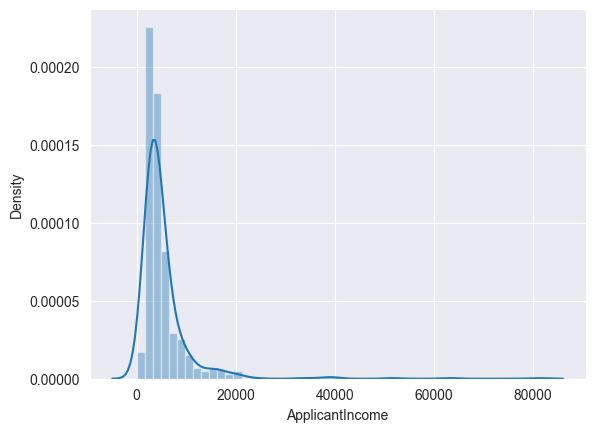

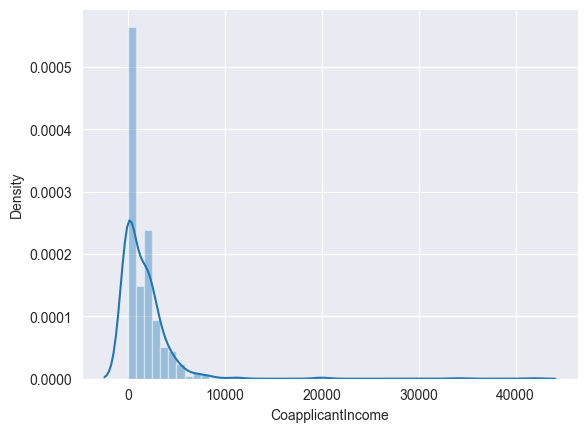

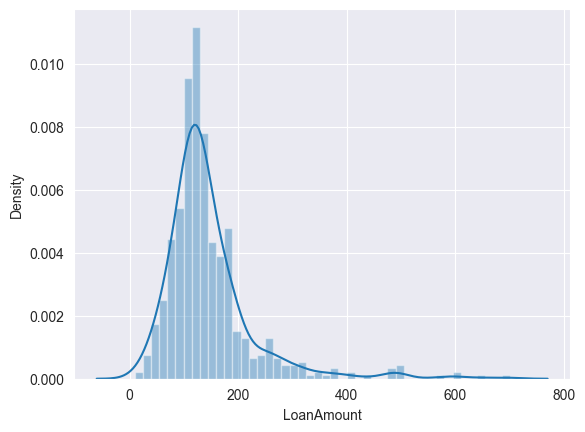

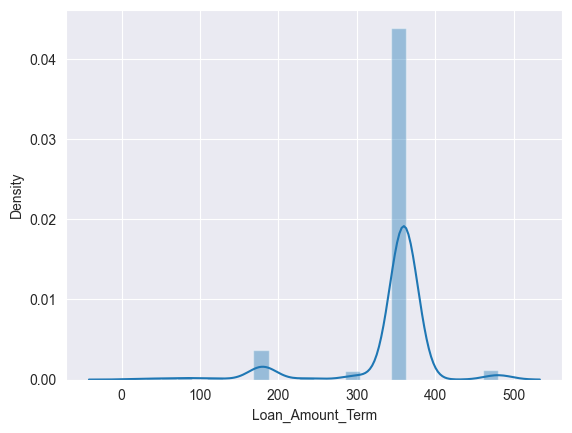

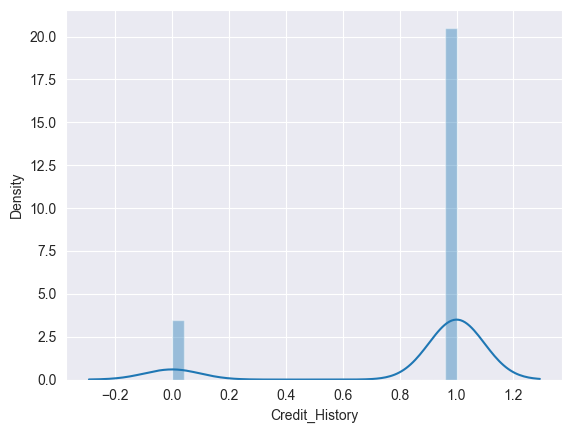

In [47]:
for i in num:
    sns.distplot(loan_df[i])
    plt.show()

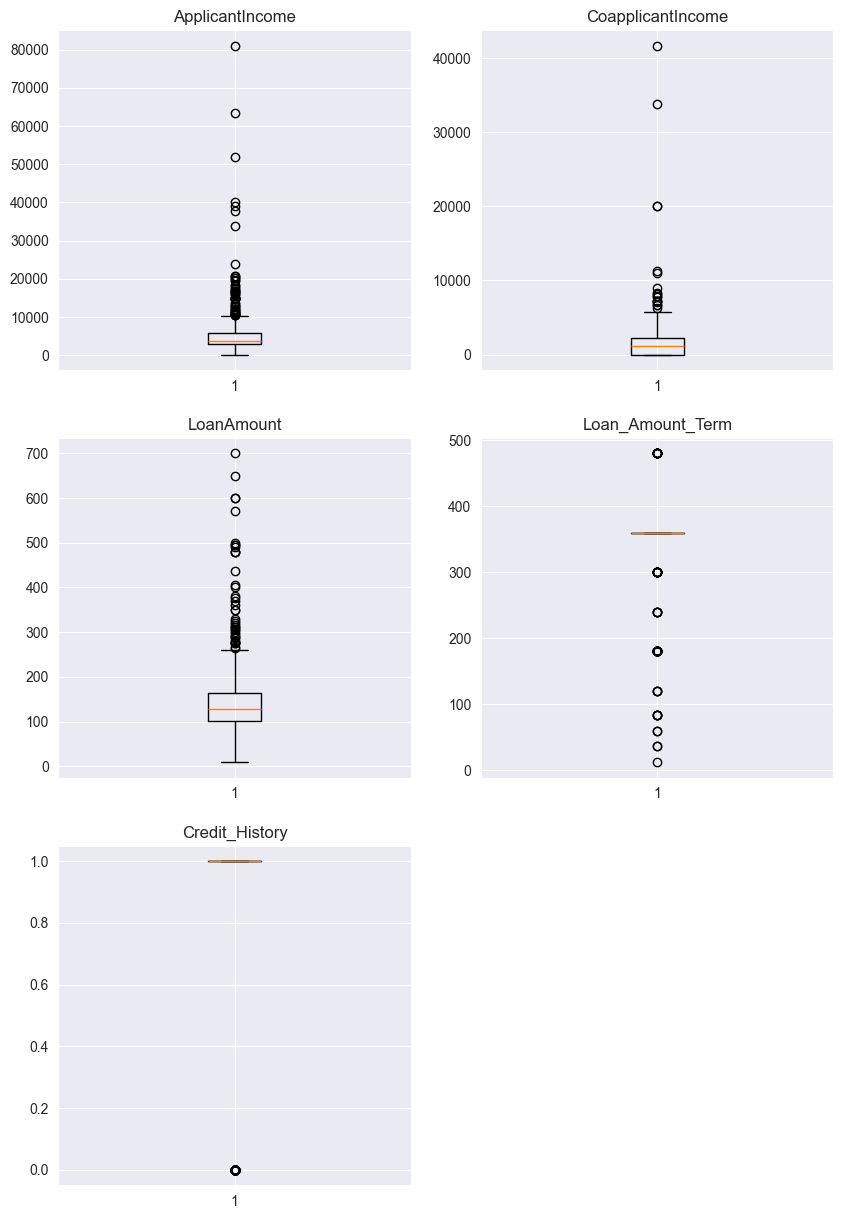

In [48]:
plt.figure(figsize=(10,15))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(loan_df[column])
plt.show()

In [49]:
q1=np.quantile(loan_df['ApplicantIncome'],0.25)
q2=np.quantile(loan_df['ApplicantIncome'],0.50)
q3=np.quantile(loan_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=loan_df['ApplicantIncome']>ub1
con2=loan_df['ApplicantIncome']<lb1
outlier=loan_df[con1|con2]
len(outlier)

50

In [50]:
q1=np.quantile(loan_df['ApplicantIncome'],0.25)
q2=np.quantile(loan_df['ApplicantIncome'],0.50)
q3=np.quantile(loan_df['ApplicantIncome'],0.75)

iqr=q3-q1

ub1=q3+(1.5*iqr)
lb1=q1-(1.5*iqr)

con1=loan_df['ApplicantIncome']<ub1
con2=loan_df['ApplicantIncome']>lb1
non_outlier=loan_df[con1&con2]
len(non_outlier)

564

In [51]:
v=(len(outlier)/len(loan_df))*100
v

8.143322475570033

In [52]:
q1=np.quantile(loan_df['CoapplicantIncome'],0.25)
q2=np.quantile(loan_df['CoapplicantIncome'],0.50)
q3=np.quantile(loan_df['CoapplicantIncome'],0.75)

iqr=q3-q1

ub2=q3+(1.5*iqr)
lb2=q1-(1.5*iqr)

con1=loan_df['CoapplicantIncome']<ub2
con2=loan_df['CoapplicantIncome']>lb2
non_outlier2=loan_df[con1&con2]
len(non_outlier2)

596

**LoanAmount**

In [53]:
q1=np.quantile(loan_df['LoanAmount'],0.25)
q2=np.quantile(loan_df['LoanAmount'],0.50)
q3=np.quantile(loan_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=loan_df['LoanAmount']>ub3
con2=loan_df['LoanAmount']<lb3
outlier3=loan_df[con1|con2]
len(outlier3)

41

In [54]:
v=(len(outlier3)/len(loan_df))*100
v

6.677524429967427

In [55]:
q1=np.quantile(loan_df['LoanAmount'],0.25)
q2=np.quantile(loan_df['LoanAmount'],0.50)
q3=np.quantile(loan_df['LoanAmount'],0.75)

iqr=q3-q1

ub3=q3+(1.5*iqr)
lb3=q1-(1.5*iqr)

con1=loan_df['LoanAmount']<ub3
con2=loan_df['LoanAmount']>lb3
non_outlier3=loan_df[con1&con2]
len(non_outlier3)

573

In [56]:
loan_df["ApplicantIncome"]=np.clip(loan_df['ApplicantIncome'],lb1,ub1)

In [57]:
len(loan_df['ApplicantIncome'])

614

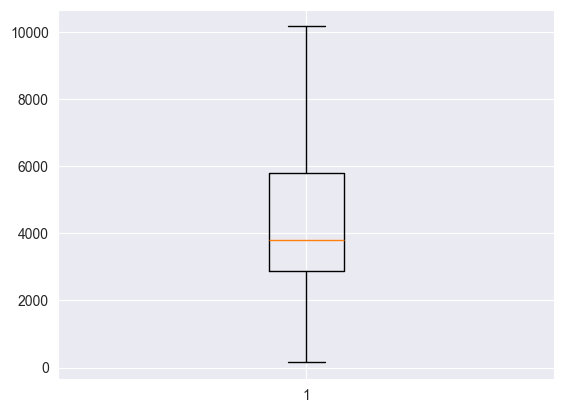

In [58]:
plt.boxplot(loan_df['ApplicantIncome'])
plt.show()

In [59]:
loan_df["CoapplicantIncome"]=np.clip(loan_df['CoapplicantIncome'],lb2,ub2)

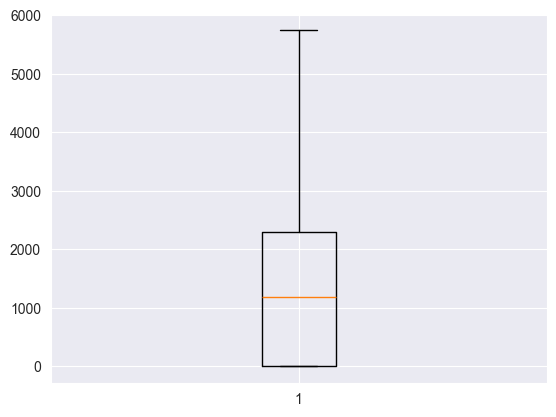

In [60]:
plt.boxplot(loan_df['CoapplicantIncome'])
plt.show()

In [61]:
loan_df["LoanAmount"]=np.clip(loan_df['LoanAmount'],lb3,ub3)

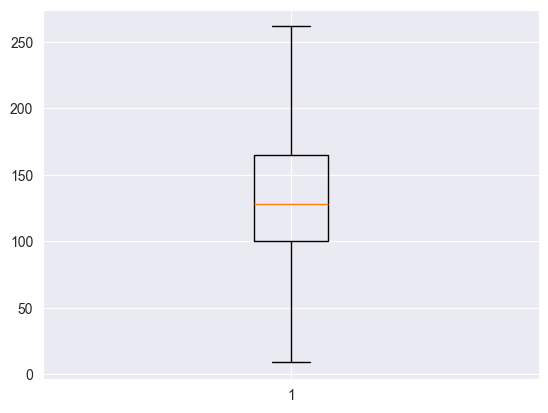

In [62]:
plt.boxplot(loan_df['LoanAmount'])
plt.show()

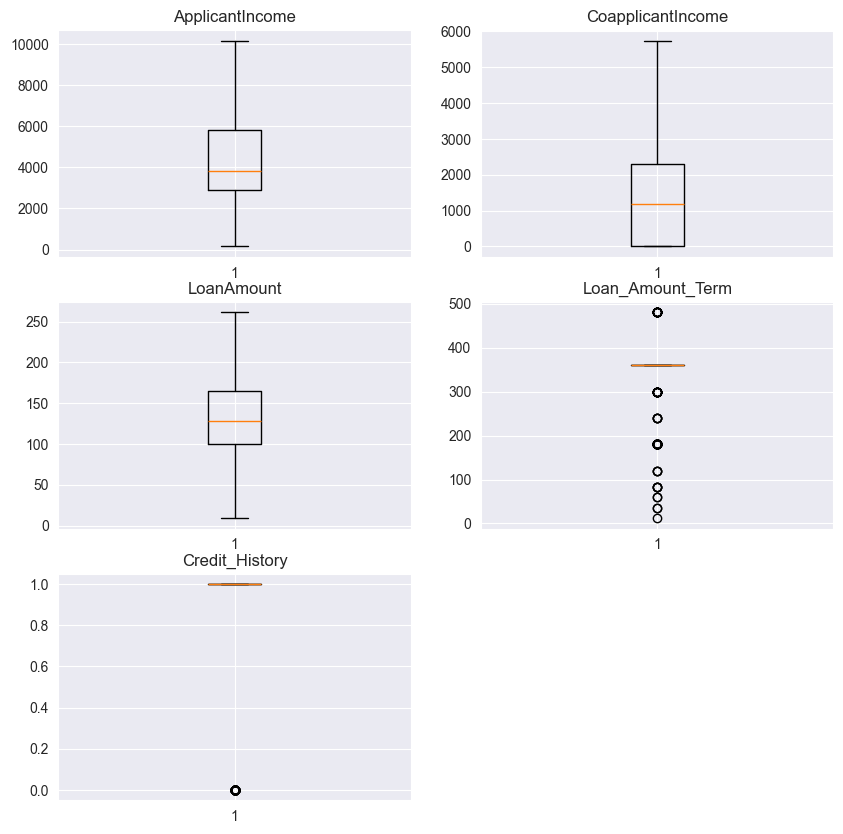

In [63]:
plt.figure(figsize=(10,10))
for i,column in enumerate(num):
    plt.subplot(3,2,i+1)
    plt.title(column)
    plt.boxplot(loan_df[column])
plt.show()

**Bivariate Analysis**

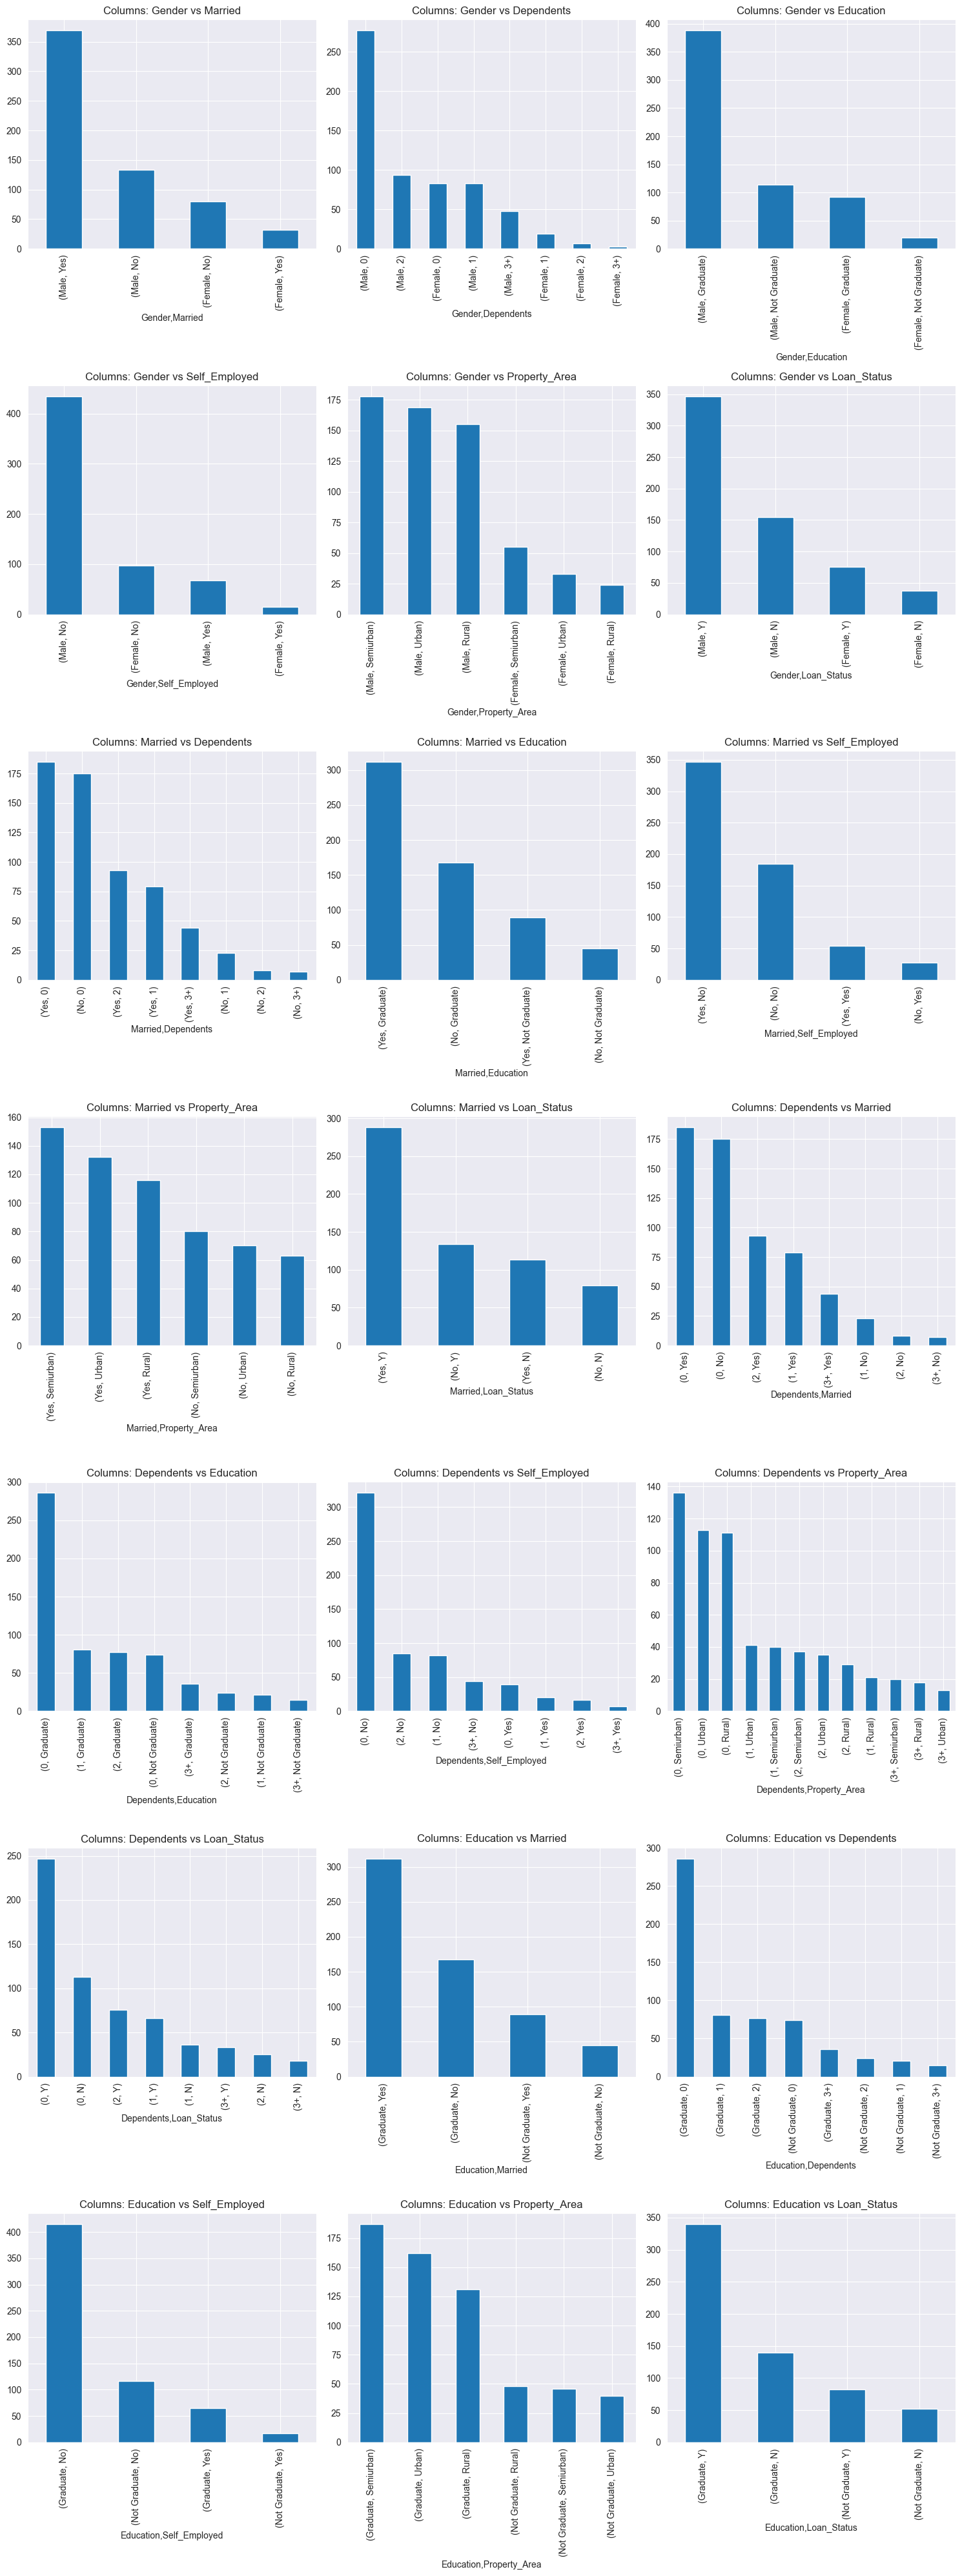

In [64]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 7 * 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 40))  # 9 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in cat:
    for j in cat[1:]:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 3, plot_counter % 3]  # Get the current subplot
            loan_df[[i, j]].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**MUltivariate**

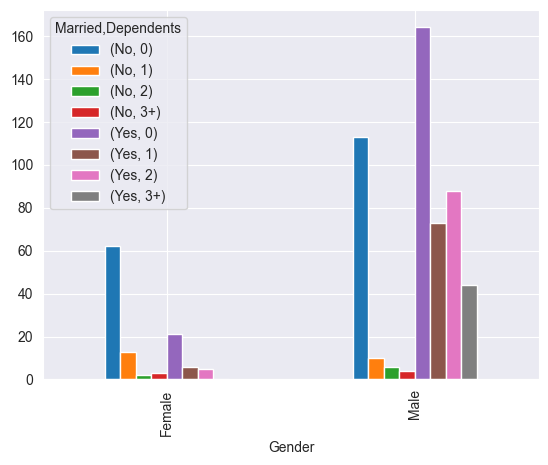

In [65]:
col1=loan_df['Gender']
col2=loan_df['Married']
col3=loan_df['Dependents']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

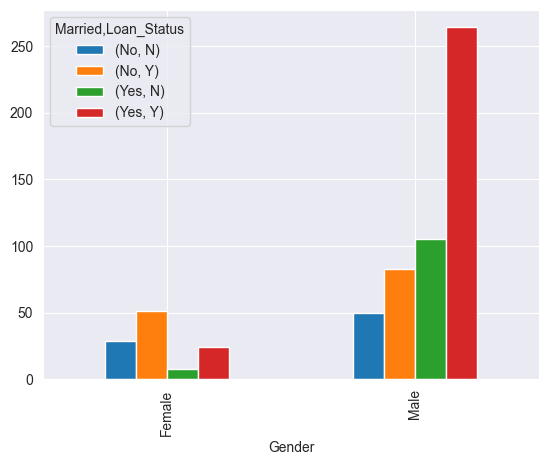

In [66]:
col1=loan_df['Gender']
col2=loan_df['Married']
col3=loan_df['Loan_Status']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

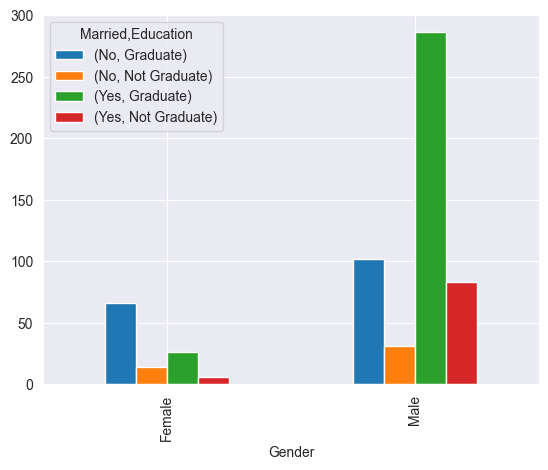

In [67]:
col1=loan_df['Gender']
col2=loan_df['Married']
col3=loan_df['Education']
col=[col2,col3]
result=pd.crosstab(col1,col)
#result
result.plot(kind='bar')
plt.show()

**Numerical VS Numerical**

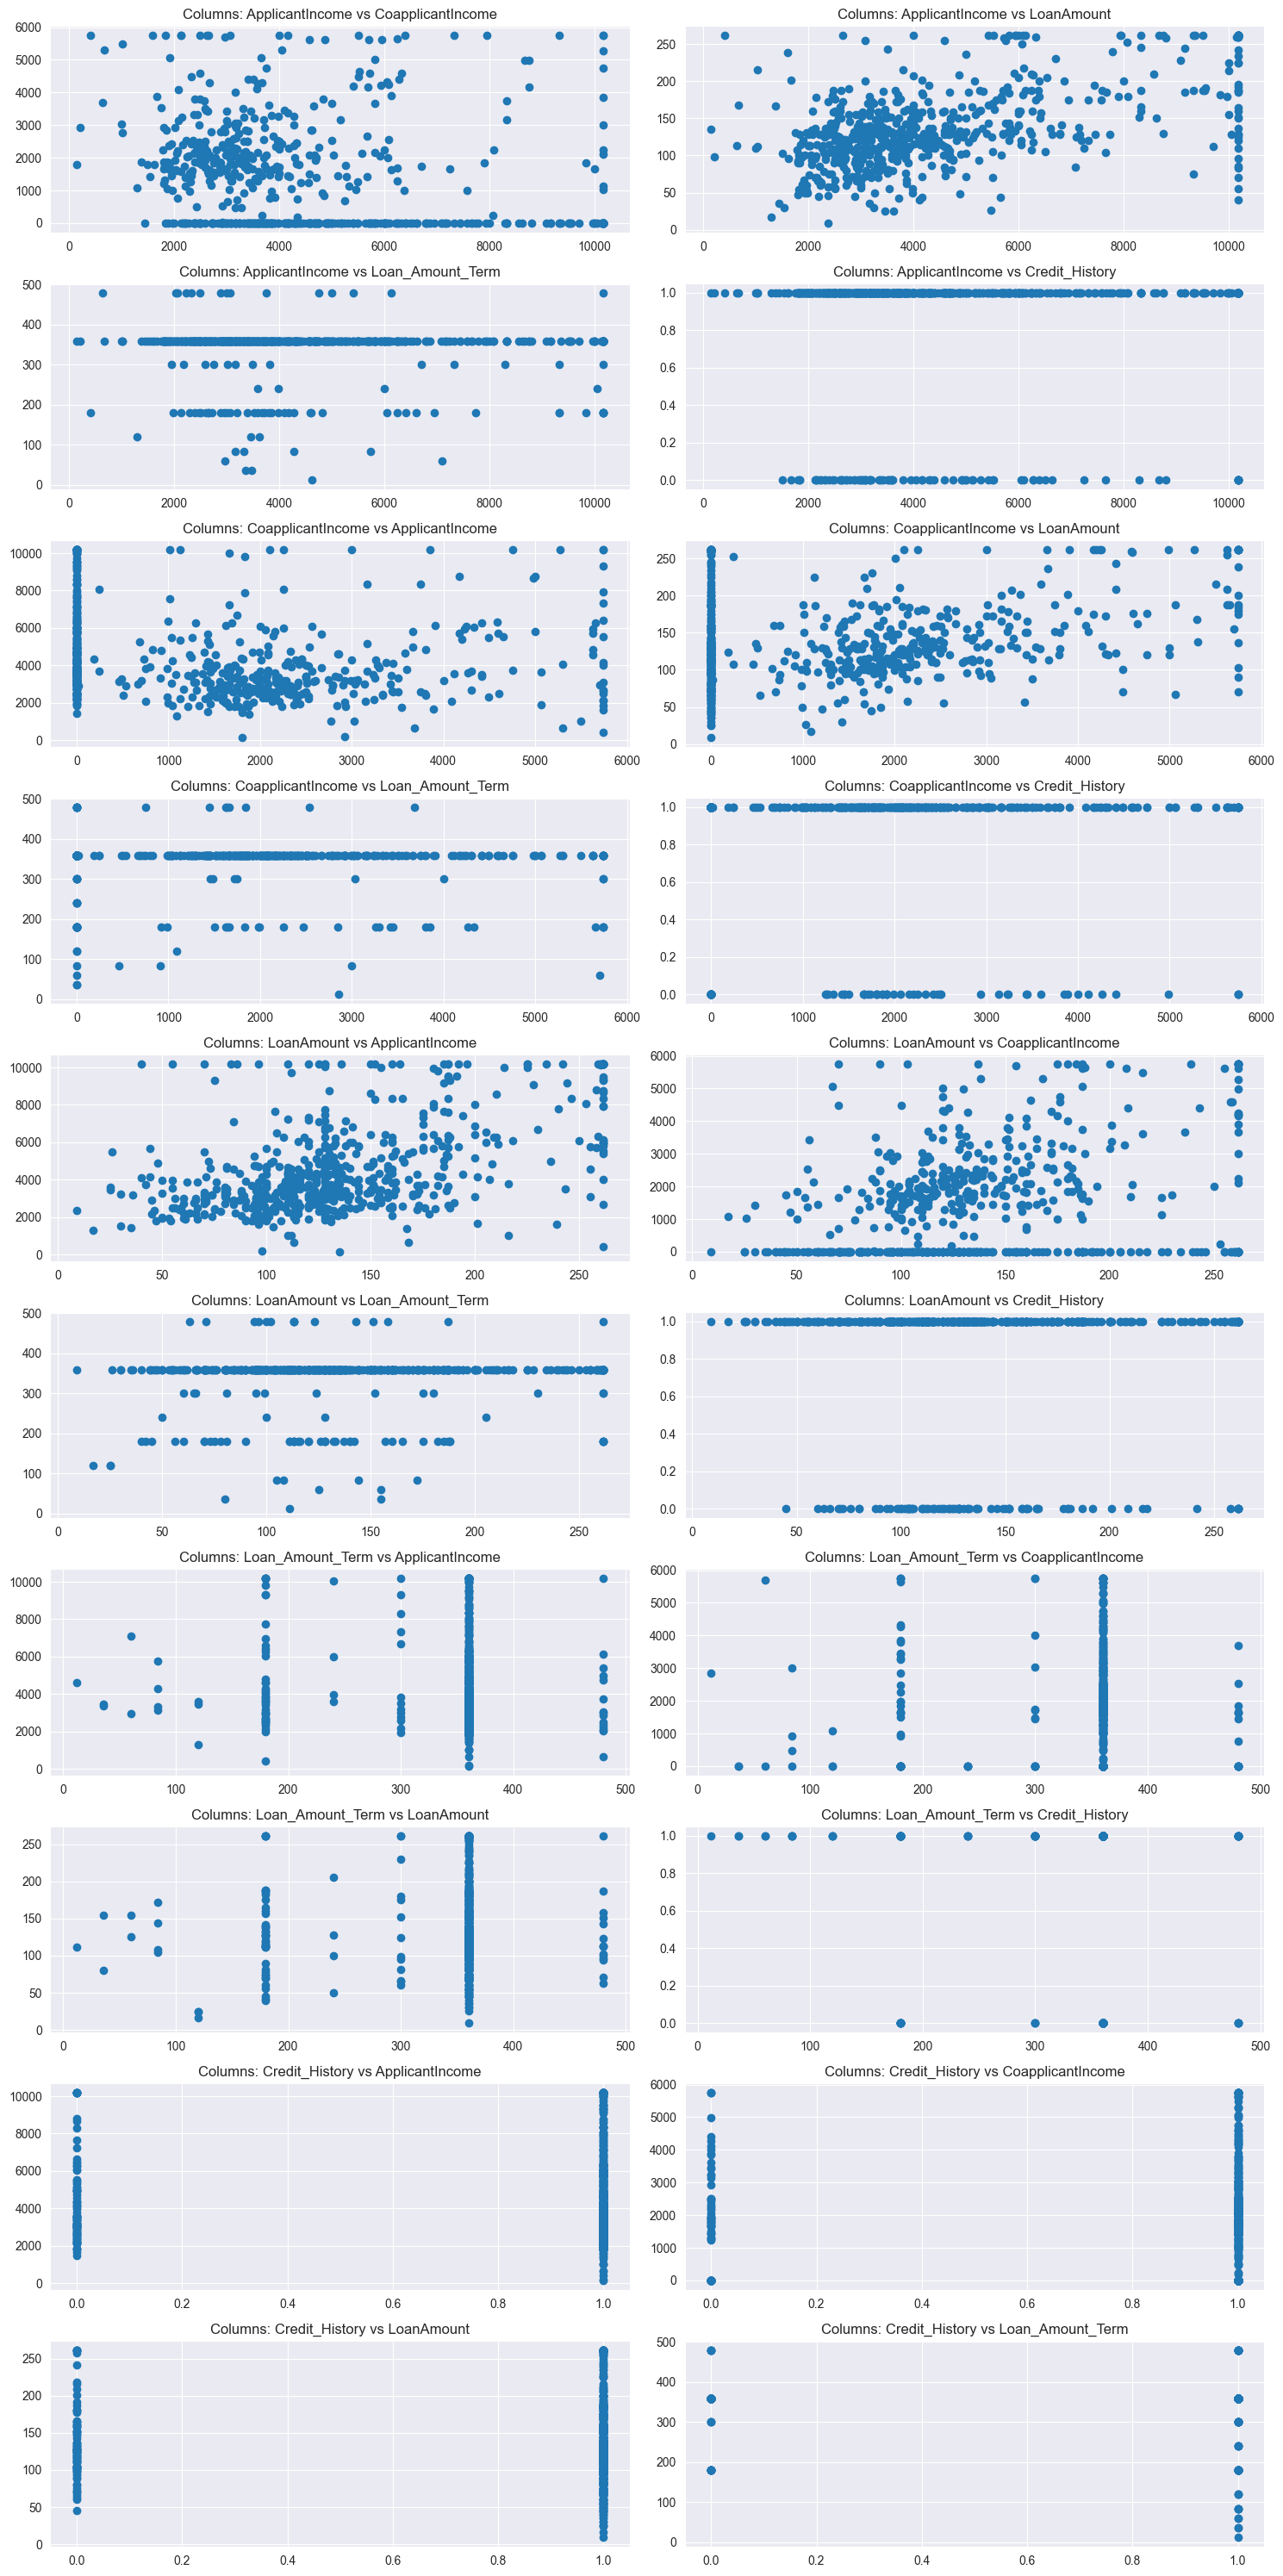

In [68]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 10 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(10, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(loan_df[i], loan_df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Correlation**

In [70]:
corr=loan_df.corr(numeric_only=True)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.228956,0.557953,-0.023926,0.035345
CoapplicantIncome,-0.228956,1.000000,0.265021,-0.029295,-0.001710
LoanAmount,0.557953,0.265021,1.000000,0.063612,0.004320
Loan_Amount_Term,-0.023926,-0.029295,0.063612,1.000000,-0.004705
Credit_History,0.035345,-0.001710,0.004320,-0.004705,1.000000


**HeatMap**

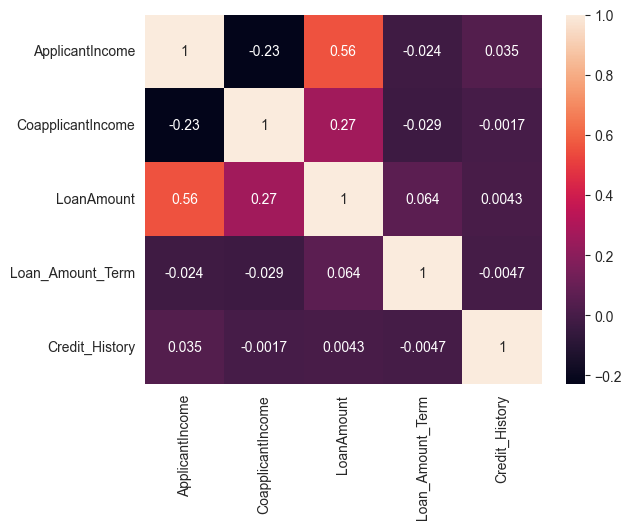

In [71]:
sns.heatmap(corr,annot=True)
plt.show()

**Check the Skew**

In [72]:
for i in (num):
    print(i,loan_df[i].skew())

ApplicantIncome 1.0398459567416636
CoapplicantIncome 1.012762761452279
LoanAmount 0.6836926591947383
Loan_Amount_Term -2.4021122563890396
Credit_History -2.0219705924848985


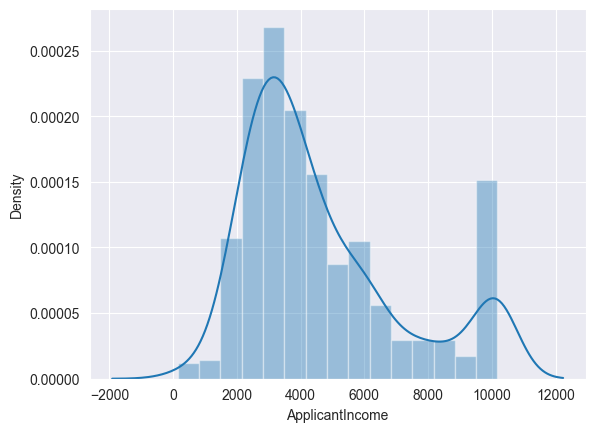

In [73]:
sns.distplot(loan_df['ApplicantIncome'])
plt.show()

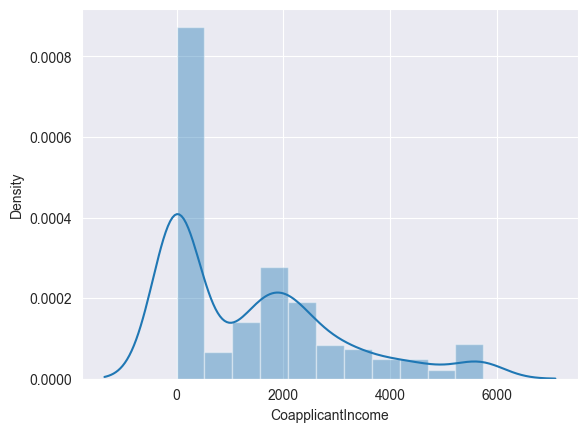

In [74]:
sns.distplot(loan_df['CoapplicantIncome'])
plt.show()

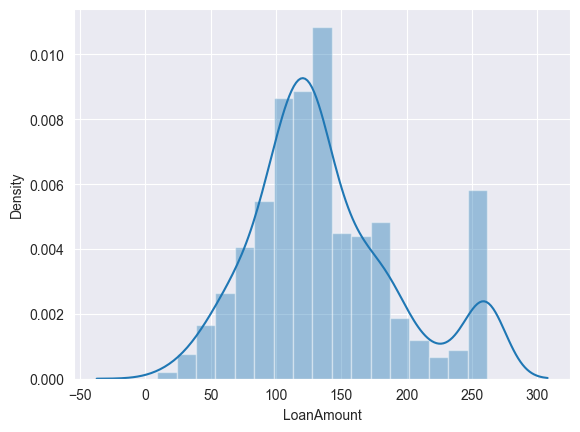

In [75]:
sns.distplot(loan_df['LoanAmount'])
plt.show()

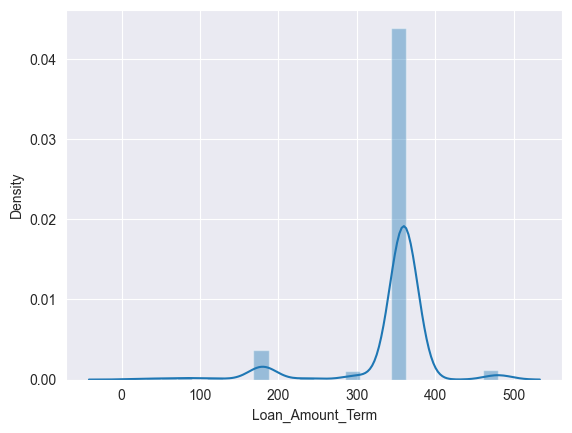

In [76]:
sns.distplot(loan_df['Loan_Amount_Term'])
plt.show()

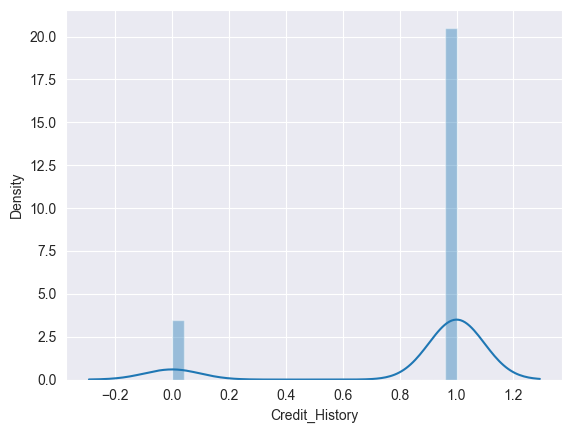

In [77]:
sns.distplot(loan_df['Credit_History'])
plt.show()

**Conclusion**

EDA helped in understanding data patterns, handling missing values, and identifying important features 
like Credit_History and Income that impact loan approval.It also helped detect outliers and data distribution 
before applying machine learning models.